In [1]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import numpy as np
import cmath
import matplotlib.pyplot as plt
import h5py

print(os.getpid())
%cd ../

colors_ = ["blue", "red", "green", "gray", "black"]

import pylib.mix as mix
import pylib.measurement as mse
import pylib.qsvt_angles as qsvt_a
import cvxpy as cp
import pylib.Chebyschev_coefs as ch

28748
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

Function parameter:		 2.000e+01
Chosen function, parity:	 LCHS-weights, 0

Direct and minimization methods are used.
Computation status:  1.1409944201625468e-09


max. diff. between coefs: 2.002e-15

Chosen polynomial's degree:	 400
Number of coefficients:		 200
max. abs. error: 1.539e-05


<IPython.core.display.Javascript object>


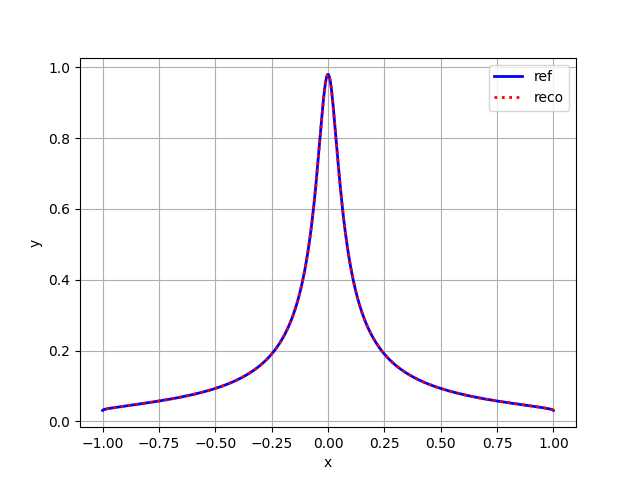

In [20]:
# ---------------------------------------------------
# --- Choose the function to approximate ---
# ---------------------------------------------------
mix.reload_module(ch)

# --- Choose the computational method ---
sel_method = 2

# --- Choose the function to approximate ---
# id_fun = 1 # chosen function;
# par1   = 10 # function parameter;

id_fun = 4 # chosen function;
par1   = 20 # function parameter;

# --- Choose the polynomial degree ---
# Nd = int(900/40. * 5) 
# Nd = int(300/5. * 10) 
Nd = 400

# --- Computation ---
oo_ch_ = ch.Ch_()
oo_ch_.choose_method(sel_method)
oo_ch_.choose_func(id_fun, par1)
oo_ch_.compute_Ch(Nd)
oo_ch_.plot_reconstructed_function()

<IPython.core.display.Javascript object>


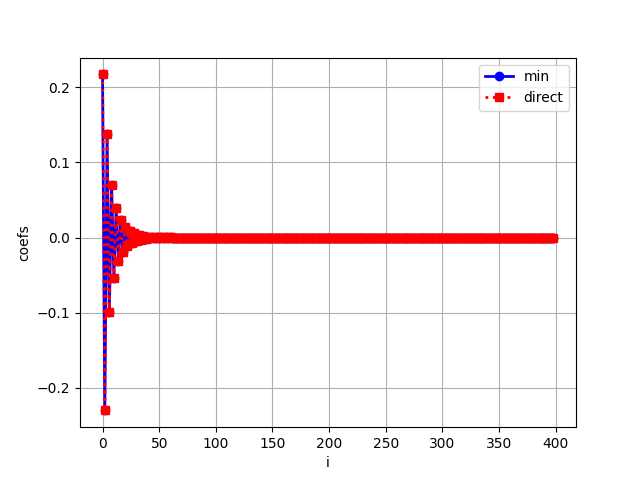

In [5]:
# ----------------------------------------------------
# --- Plot Chebyschev coefficients ---
# ----------------------------------------------------
oo_ch_.plot_coefficients()

In [17]:
# -----------------------------------------------------------------
# --- Store the coefficients into the .hdf5 file ---
# -----------------------------------------------------------------
oo_ch_.save_coefficients()

write angles to:
 ./tools/QSVT-angles/LCHS-weights/coefs//LCHS-weights_10_2.hdf5


In [15]:
for i in range(30):
    plt.close()

max. abs. err: 3.377e-04


<IPython.core.display.Javascript object>


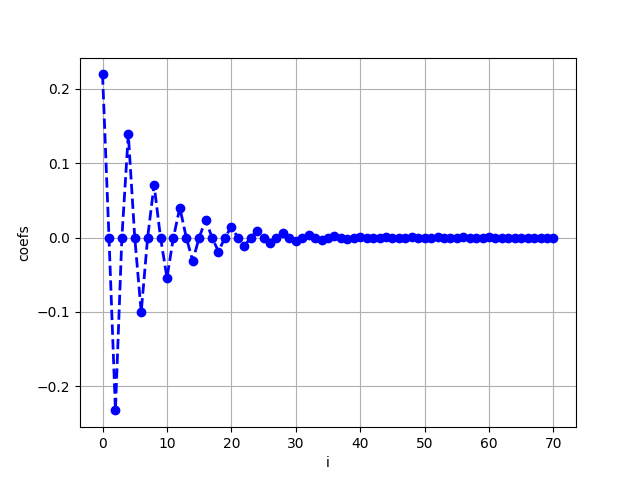

<IPython.core.display.Javascript object>


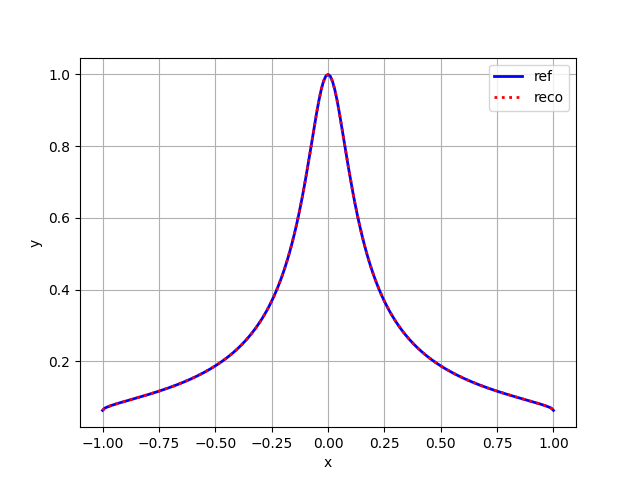

In [7]:
# -----------------------------------------------------------------
# --- Direct computation of the Chebyschev coefficients ---
# -----------------------------------------------------------------

def ff_x2(x):
    return 0.3 + 0.2*x + 0.4*x**2

def ff_gauss(x):
    return np.exp(-x**2 / (2.*par_f**2))

def ff_k2(x):
    return np.sqrt(1./(1. + par_f**2 * np.arcsin(x)**2))


def compute_coef(n_order):
    c1 = 0.0
    for ii in range(N_roots):
        c1 += ff_(x_roots[ii]) * np.cos(n_order * np.arccos(x_roots[ii]))
    c1 *= 2./N_roots
    return c1

def reconstruct_ff(x):
    res = 0.0
    for ii in range(N_coefs):
        res += coefs_Ch[ii] * np.cos(ii * np.arccos(x))
    return res
# -------------------------------------

par_f = 10
ff_ = ff_k2


N_roots = 1001
x_roots = np.zeros(N_roots)
for ii in range(N_roots):
    x_roots[ii] = np.cos((2*ii + 1)*np.pi / (2.*N_roots));

    
# --- Compute the Chebyschev coefficients ---   
N_coefs = 71
coefs_Ch = np.zeros(N_coefs)
for ii in range(N_coefs):
    coefs_Ch[ii] = compute_coef(ii)
    if ii == 0:
        coefs_Ch[ii] *= 0.5


# --- Reconstruct the function ---
Nx_test = 201
x_test = np.linspace(-1.0, 1.0, Nx_test)   
f_orig = np.zeros(Nx_test)
f_rec = np.zeros(Nx_test)
for ii in range(Nx_test):
    f_orig[ii] = ff_(x_test[ii])
    f_rec[ii] = reconstruct_ff(x_test[ii])
    
# --- Compute the absolute error ---
max_abs_err = np.max(np.abs(f_orig - f_rec))
print("max. abs. err: {:0.3e}".format(max_abs_err))
    
    
# --- Plotting coefficients ---    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    np.array(range(N_coefs)), 
    coefs_Ch, 
    color="b", linewidth = 2, linestyle='--', marker = "o"
)
plt.xlabel('i')
plt.ylabel("coefs")
plt.grid(True)
plt.show()   

# --- Plotting functions ---    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_test, f_orig, color="b", linewidth = 2, linestyle='-', label = "ref")
ax.plot(x_test, f_rec,  color="r", linewidth = 2, linestyle=':', label = "reco")
plt.xlabel('x')
plt.ylabel("y")
# plt.xlim(-5, 5)
plt.grid(True)
plt.legend()
plt.show()

In [83]:
from scipy.integrate import quad

def compute_coef(x):
    return ff_(x) * np.cos(no_ * np.arccos(x)) / np.sqrt(1. - x**2)

def ff_(x):
    return 0.3 + 0.2*x + 0.4*x**2

def reconstruct_ff(x):
    res = 0.0
    for ii in range(Nc_):
        res += coefs_[ii] * np.cos(ii * np.arccos(x))
    return res
# -------------------------------------
Nc_ = 3
coefs_ = np.zeros(Nc_)
for ii in range(Nc_):
    no_ = ii
    coefs_[ii] = quad(compute_coef, -1, 1)[0] * 2./np.pi
    if ii == 0:
        coefs_[ii] *= 0.5

    
x1 = 0.2
print(
    reconstruct_ff(x1) - ff_(x1)
)

-3.952393967665557e-14
